### Process images
- Segment out the actual image
- Create a binary image that can be used in a fully connected network model
- Create image resized to fit into a CNN

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
import numpy as np
import cv2

In [28]:
arhmaicimage = './ahmraic/2/Annotation 2019-05-23 124631.png'

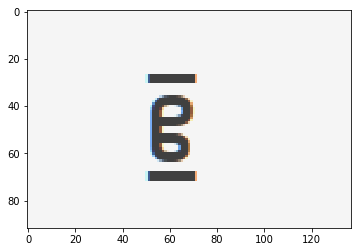

In [29]:
img = cv2.imread(arhmaicimage)
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [30]:
# Get threshold from image
threshold_value = threshold_otsu(imggray)
img_background = imggray > threshold_value

In [31]:
bimage = img_background.astype(np.int)
bimage2 = img_background.astype(np.uint8)

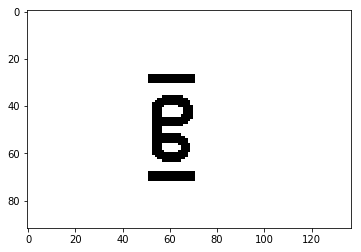

In [32]:
plt.imshow(bimage2, cmap='gray')

In [33]:
def get_boundingbox(image):
    "Get tight bounding box on image"
    height,length = image.shape
    for h in range(height):
        vline = image[h,:]
        if sum(vline) < length:
            y1 = h
            break
    for b in range(height-1,0,-1):
        bline = image[b,:]
        if sum(bline) < length:
            y2 = b
            break
    for l in range(length):
        lline = image[:,l]
        if sum(lline) < height:
            x1 = l
            break
    for c in range(length-1,0,-1):
        cline = image[:,c]
        if sum(cline) < height:
            x2 = c
            break
            
    return (x2,y2,x1,y1)

In [34]:
def pad_image(im, desired_size):
    "Create square image with padding"
    "ref: https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/"

    old_size = im.shape[:2] # old_size is in (height, width) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])

    # new_size should be in (width, height) format
    im = cv2.resize(im, (new_size[1], new_size[0]))

    delta_w = desired_size - new_size[1]
    delta_h = desired_size - new_size[0]
    top, bottom = delta_h//2, delta_h-(delta_h//2)
    left, right = delta_w//2, delta_w-(delta_w//2)

    
    color = [1, 1, 1]
    new_im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT,
        value=color)
    return new_im

In [35]:
x2, y2, x1, y1 = get_boundingbox(bimage2)

In [36]:
print(x1,y1, x2, y2)

51 27 70 71


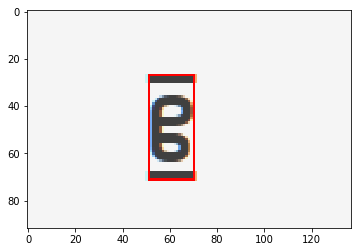

In [37]:
rimg = img.copy()
cv2.rectangle(rimg,(x1,y1),(x2,y2),(255,0,0), 1)
plt.imshow(rimg)

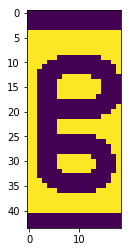

In [38]:
eimg = bimage2[y1:y2,x1:x2]
plt.imshow(eimg)

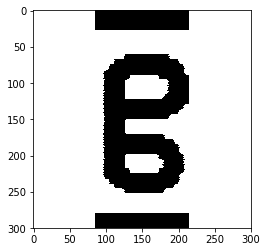

In [40]:
pimg = pad_image(eimg, 300)
plt.imshow(pimg, cmap='gray')